### Khai báo thư viện và đọc file

In [21]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
from apyori import apriori
from mlxtend.frequent_patterns import  association_rules, apriori

In [2]:
data = pd.read_csv("giao_dich.csv", index_col = "Unnamed: 0")
data.head()

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay,don_gia,ma_khach_hang,khu_vuc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,58000.0,17850.0,Anh
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,78000.0,17850.0,Anh
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,63000.0,17850.0,Anh
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,78000.0,17850.0,Anh
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,78000.0,17850.0,Anh


In [3]:
data.shape

(541909, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ma_giao_dich   541909 non-null  object 
 1   ma_hang        541909 non-null  object 
 2   mo_ta          540455 non-null  object 
 3   so_luong       541909 non-null  int64  
 4   ngay           541909 non-null  object 
 5   don_gia        541909 non-null  float64
 6   ma_khach_hang  406829 non-null  float64
 7   khu_vuc        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [5]:
data["ngay"].dtype

dtype('O')

* Cột ngày đang ở object , ta nên chuyển lại về đúng định dạng để dễ tách ngày và giờ ra hơn
* Ngoài ra ta cũng cần biết thêm về giá của sản phẩm đó 
    * Giá(một sản phẩm) = (tổng tiền) / (số lượng)

In [6]:
data["ngay"] = pd.to_datetime(data["ngay"], format = "%d/%m/%Y, %H:%M:%S",infer_datetime_format= True)
data["ngay"].dtype

dtype('<M8[ns]')

In [7]:
data["tong_don_gia"] = (data["don_gia"]*data["so_luong"])
col = data.pop("tong_don_gia")
data.insert(6,"tong_don_gia", col)

* Tách từ cột ngày ban đầu ra thành các cột ( năm, tháng , ngày)

In [8]:
data = data.rename(columns={"ngay":"ngay_gio"})
data["nam"] = pd.DatetimeIndex(data["ngay_gio"]).year
data["thang"] = pd.DatetimeIndex(data["ngay_gio"]).month
data["ngay"] = pd.DatetimeIndex(data["ngay_gio"]).day

In [9]:
data.head()

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,58000.0,348000.0,17850.0,Anh,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,63000.0,504000.0,17850.0,Anh,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1


In [10]:
data["ma_khach_hang"].dtype

dtype('float64')

In [11]:
st = "string"
data = data.astype({"ma_khach_hang":st, "nam":st, "thang":st, "ngay":st})

In [12]:
data["ma_khach_hang"].dtype

StringDtype

In [13]:
data.describe()

,so_luong,don_gia,tong_don_gia
count,541909.000000,5.419090e+05,5.419090e+05
mean,9.552250,1.054637e+05,4.118894e+05
std,218.081158,2.212414e+06,8.732431e+06
min,-80995.000000,-2.529340e+08,-3.887760e+09
25%,1.000000,2.900000e+04,7.800000e+04
50%,3.000000,4.800000e+04,2.220000e+05
75%,10.000000,9.400000e+04,3.960000e+05
max,80995.000000,8.910490e+08,3.887760e+09


### Tạo thêm một cột (mua) chứa các mùa trong năm và một cột (Chau_luc) chứa các châu lục 

In [14]:
data["mua"] = data["thang"]

In [15]:
x = data["mua"]
xuan = ['1','2','3']
ha = ['4','5','6']
thu = ['7','8','9']
dong = ['10','11','12']
mua_x = x.replace(xuan, "Xuân")
mua_h = mua_x.replace(ha,"Hạ")
mua_t = mua_h.replace(thu, "Thu")
mua_d = mua_t.replace(dong, "Đông")
data["mua"] = mua_d

In [16]:
data["mua"].value_counts()

Đông    213459
Thu     125028
Hạ      103820
Xuân     99602
Name: mua, dtype: int64

In [17]:
Chau_a = ['Các tiểu vương quốc Ả Rập thống nhất','Ả Rập Xê-út','Bahrain','Li Băng','Singapore','Hồng Kông','Israel','Nhật']
Chau_au = ['Cộng Hòa Séc','Litva','Hy Lạp','Ai-xơ-len','Ba Lan','Đan Mạch','Áo','Thụy Điển','Cộng Hòa Síp','Phần Lan','Ý',
           'Na Uy','Thụy Sĩ','Bỉ','Hà Lan','Ireland','Pháp', 'Đức','Anh','Ma-ta','Cộng đồng châu Âu','Bồ Đào Nha','Tây Ban Nha']
Chau_my = ['Brazil','Canada', 'Mỹ', 'Quần đảo Channel']
chau_phi = 'Cộng hòa Nam Phi'
Chau_dai_duong = 'Úc'
data["chau_luc"] = data["khu_vuc"]

In [18]:
x = data["chau_luc"]
chau_a = x.replace(Chau_a, "Châu Á")
chau_au = chau_a.replace(Chau_au, "Châu Âu")
chau_my = chau_au.replace(Chau_my, "Châu Mỹ")
chau_phi = chau_my.replace(chau_phi, "Châu Phi")
chau_dai_duong = chau_phi.replace(Chau_dai_duong, "Châu Đại Dương")
data["chau_luc"] = chau_dai_duong

In [19]:
data["chau_luc"].value_counts()

Châu Âu           537600
Châu Á              1314
Châu Đại Dương      1259
Châu Mỹ             1232
Không xác định       446
Châu Phi              58
Name: chau_luc, dtype: int64

In [20]:
data.head()

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,58000.0,348000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,63000.0,504000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu


In [21]:
data.isna().sum()

ma_giao_dich          0
ma_hang               0
mo_ta              1454
so_luong              0
ngay_gio              0
don_gia               0
tong_don_gia          0
ma_khach_hang    135080
khu_vuc               0
nam                   0
thang                 0
ngay                  0
mua                   0
chau_luc              0
dtype: int64

* Cột mô tả có số lượng missing ít , không đáng ngại
* Cột mã khách hàng bị missing data khá 
nhiều $ \approx$ 25%
* Ứng với mỗi khách hàng sẽ có 1 mã khách hàng riêng và mã giao dịch riêng ta sẽ làm cho mã giao dịch thành mã khách hàng (nếu mã khách hàng đó là missing)

<AxesSubplot:>

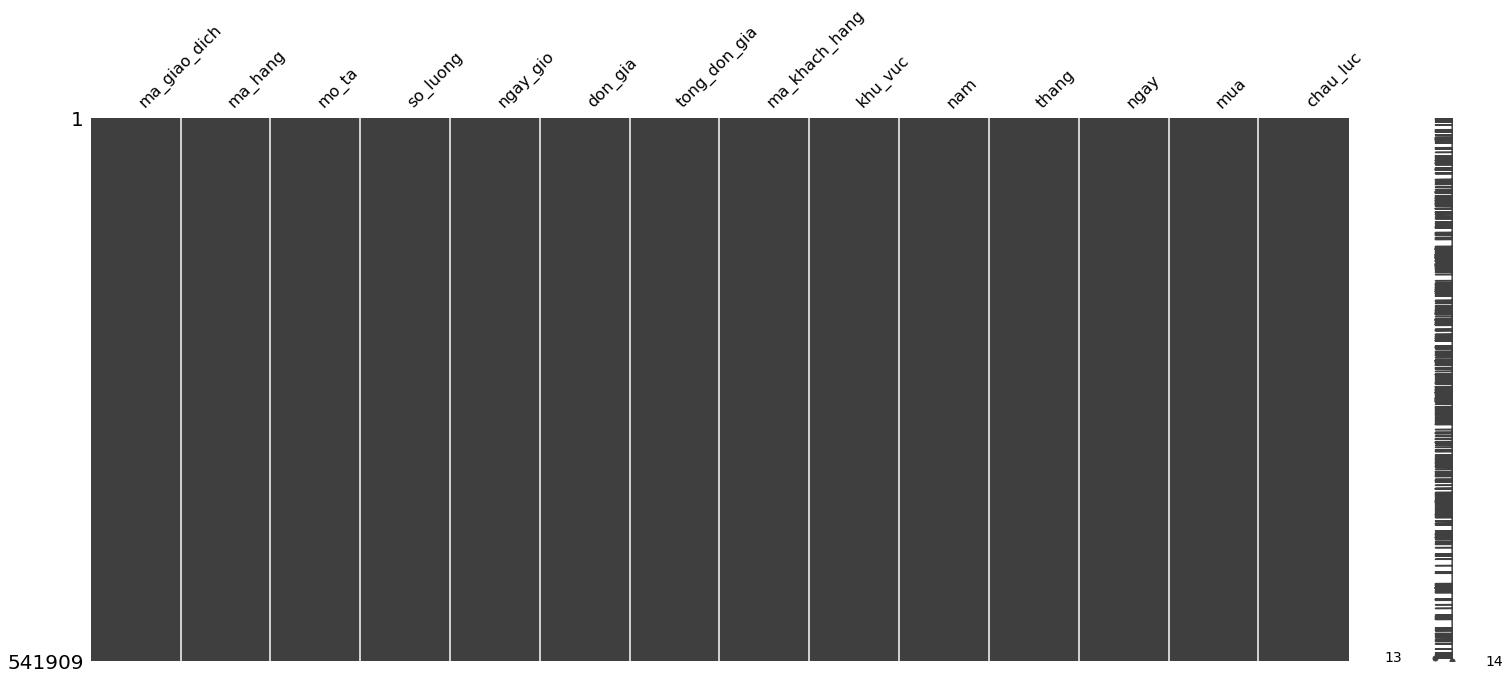

In [22]:
data["ma_khach_hang"].fillna(value = data["ma_giao_dich"],axis = 0, inplace =True)
msno.matrix(data)

In [23]:
#data.head()

In [24]:
#data.to_csv("giao_dich_clean.csv")

### Từ data ban đầu , ta tạo thêm được một số data khác

In [25]:
# Danh sách các khách mua hàng 
danh_sach_khach_hang = data.groupby('ma_khach_hang')
danh_sach_khach_hang = danh_sach_khach_hang .first()

In [26]:
# Khách hàng đến từ châu lục nào là chủ yếu?
danh_sach_khach_hang['chau_luc'].value_counts()

Châu Âu           8006
Châu Á              39
Châu Mỹ             18
Không xác định       9
Châu Đại Dương       9
Châu Phi             1
Name: chau_luc, dtype: int64

**Khách hàng chủ yếu đến từ khu vực Châu Âu, nguyên nhân là shop bán hàng lưu niệm này ở tại Anh. Trong tương lai nên tiếp tục phát triển ở thị trường Châu Âu, đẩy mạnh các mặt hàng mới và tăng cường số lượng hàng hóa đồng thời Châu Mỹ và Châu Á là 2 châu lục lớn vì vậy nên mở rộng thị trường bán hàng sang hai Châu Lục này bằng cách mở thêm chi nhánh bán hàng tại 2 Châu Lục**

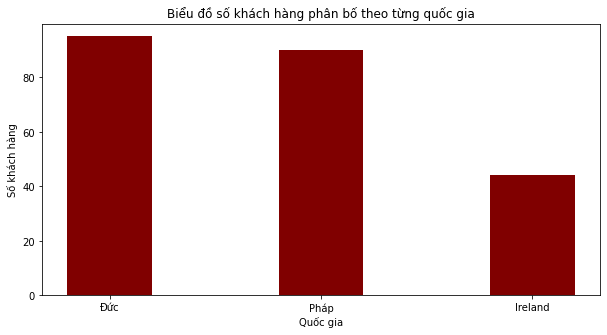

In [27]:
 # creating the dataset
df = {'Đức':95, 'Pháp':90,
        'Ireland':44}
courses = list(df.keys())
values = list(df.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Quốc gia")
plt.ylabel("Số khách hàng")
plt.title("Biểu đồ số khách hàng phân bố theo từng quốc gia")
plt.show()

Ngoài Anh thì Đức , Pháp , Ireland là 3 quốc gia chiếm số lượng khách mua hàng đáng kể. Lí do là vì 3 quốc gia này có khoảng cách địa lí khá gần với Anh. Cụ thể: khoảng cách từ Anh đến Đức: 1.033km , Pháp: 1.091km , Ireland: 10.469km

Ta có thể thấy, số lượng khách hàng đến từ các nước lân cận Anh chiếm khác lớn. Trong khi đó, Đan Mạch và Na Uy là 2 quốc gia khá gần với Anh nhưng lượng khách hàng thu hút được vẫn là chưa đáng kể. Tiếp tục quảng bá ở thị trường 2 quốc gia Đan Mạch và Na Uy để thu hút thêm lượng khách hàng mới từ 2 quốc gia tiềm năng này

Phân tích về thời gian bán hàng và doanh thu##

In [28]:
# Danh sách các đơn đặt hàng
danh_sach_don_hang = data.groupby('ma_giao_dich')
danh_sach_don_hang = danh_sach_don_hang .first()

In [29]:
# Đơn đặt hàng vào mùa nào là chủ yếu ?

danh_sach_don_hang['mua'].value_counts()

Đông    9139
Thu     5991
Hạ      5918
Xuân    4852
Name: mua, dtype: int64

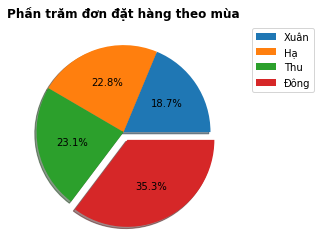

In [30]:
lab = ['Xuân','Hạ','Thu','Đông']
fig1,ax1 = plt.subplots()
sizes = [4852,5918,5991,9139]
explode = (0,0,0,0.1)
ax1.pie(sizes,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.5, 0.5, 0.5),labels=lab)
plt.title('Phần trăm đơn đặt hàng theo mùa',fontweight = 'bold')
plt.show()

Số đơn đặt hàng phân bố khá đều đối với cái mùa trong năm. Tiểu biểu nhất là vào mùa đông. Lí do mùa đông là những tháng cuối năm, mọi người sẽ có xu hướng đi du lịch nhiều hơn để nghỉ ngơi sau 1 năm làm việc.Đồng thời, mùa đông là thời điểm các nước Châu Âu đón chào những ngày lễ kỉ niệm lớn như : Giáng Sinh, năm mới...

In [31]:
df_2011 = data[data['nam'] == '2011']

In [32]:
thang = ['1','2','3','4','5','6','7','8','9','10','11']
doanh_thu_thang = []
for i in thang:
    df_tg = df_2011[df_2011['thang'] == i]
    a = df_tg['don_gia'].sum()
    doanh_thu_thang.append(a)
doanh_thu_thang

[3949697000.0,
 2914239000.0,
 3921615000.0,
 2954191000.0,
 4361513000.0,
 4590520000.0,
 3931855000.0,
 3440256000.0,
 4557751000.0,
 6026679000.0,
 7484100000.0]

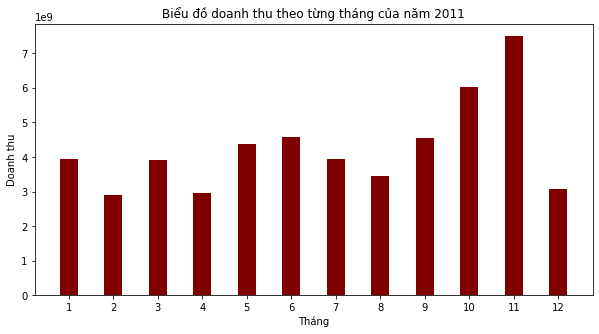

In [33]:
# creating the dataset
df = {'1': 3949697000,'2':2914239000 ,'3':3921615000 ,'4':2954191000 ,'5':4361513000.0 ,'6': 4590520000.0,
       '7':3931855000 ,'8':3440256000 ,'9':4557751000 ,'10': 6026679000 ,'11':7484100000,'12':3062613000 }
courses = list(df.keys())
values = list(df.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.title("Biểu đồ doanh thu theo từng tháng của năm 2011")
plt.show()

Doanh thu bán hàng phân bố khá đều vào các thời điểm trong năm 2011. Nổi bật tháng 10 và tháng 11 là hai tháng đem về doanh thu lớn cho shop nguyên nhân như đã lí giải ở trên vì mùa đông là thời điểm shop có số lượng bán hàng cao nhất trong năm. Đây là thời điểm thích hợp để shop mở rộng quy mô bán hàng về số lượng, áp dụng các chương trình khuyến mãi, giảm giá vào thời điểm này sẽ thu hút được thêm rất nhiều khách hàng có nhu cầu quan tâm

### Tách data thành 2 năm riêng biệt 

In [34]:
df1 = data[data.nam=='2010']
df2 = data[data.nam=='2011']

In [35]:
df2_thang = df2[["so_luong", "tong_don_gia", "thang"]].groupby("thang").sum().reset_index()
df2_thang = df2_thang.sort_values(by = "tong_don_gia", ascending = True)
df2_thang

,thang,so_luong,tong_don_gia
3,12,226333,9.924680e+09
6,4,289098,1.129827e+10
4,2,277989,1.139945e+10
0,1,308966,1.281946e+10
9,7,391116,1.560446e+10
10,8,406199,1.563765e+10
5,3,351872,1.564563e+10
8,6,341623,1.582594e+10
7,5,380391,1.656143e+10
11,9,549817,2.335817e+10


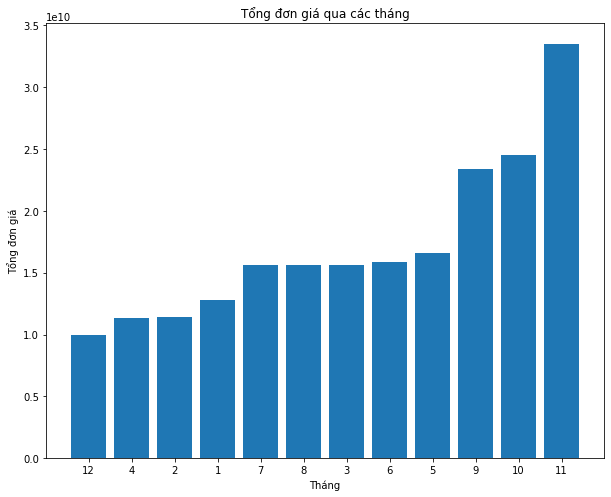

In [36]:
plt.figure(figsize = (10, 8))
plt.bar(df2_thang.thang, height = df2_thang.tong_don_gia)
plt.title("Tổng đơn giá qua các tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng đơn giá")
plt.show()

### Trả hàng (đơn giá <0 , số lượng <0)

In [37]:
data.loc[data.mo_ta == "Adjust bad debt"]

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,252934000.0,252934000.0,A563185,Anh,2011,8,12,Thu,Châu Âu
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-252934000.0,-252934000.0,A563186,Anh,2011,8,12,Thu,Châu Âu
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-252934000.0,-252934000.0,A563187,Anh,2011,8,12,Thu,Châu Âu


* Giải quyết vấn đề nợ xấu của cửa hàng
* Có thể là vay mượn để mở rộng kinh doanh hoặc tăng lượng sản phẩm nên mới vay tiền

In [38]:
df_tra_hang = data[(data.so_luong <0)]
df_tra_hang.head(3)

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
141,C536379,D,Discount,-1,2010-12-01 09:41:00,629000.0,-629000.0,14527.0,Anh,2010,12,1,Đông,Châu Âu
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,106000.0,-106000.0,15311.0,Anh,2010,12,1,Đông,Châu Âu
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,38000.0,-456000.0,17548.0,Anh,2010,12,1,Đông,Châu Âu


In [39]:
df_tra_hang.shape

(10624, 14)

In [40]:
#dfx = df_tra_hang[["mo_ta","so_luong", "don_gia"]].groupby("mo_ta").sum().reset_index()
#dfx.sort_values(by = "don_gia", ascending = True).head(40)
df_tra_hang[["mo_ta","so_luong", "don_gia"]].groupby("mo_ta").sum().reset_index().sort_values(by = "don_gia", ascending = True).head(40)

,mo_ta,so_luong,don_gia
2109,wrongly sold sets,-975,0.0
2037,damages/dotcom?,-590,0.0
2036,damages/display,-197,0.0
2035,damages/credits from ASOS.,-1512,0.0
2034,damages wax,-2844,0.0
2033,damages,-4338,0.0
2032,damaged stock,-1100,0.0
2038,damages/showroom etc,-11,0.0
2031,damaged,-1824,0.0
2029,crushed boxes,-380,0.0


* Hầu như những mặt hàng có đơn giá =0 thì là hàng hỏng, có một số là do lỗi vận chuyển dẫn đến mặt hàng hoặc hộp đựng bị hư , nên khách mới trả lại hàng.

* Đa phần là do lỗi hàng ( hàng hỏng , hộp hỏng , một số mặt hàng không thể bán được (có thể là hàng tồn kho) )

* Một số vận chuyển tới kho thì bị nứt, vỡ , ướt ,(một số nhập kho sai nên cũng bị trả)  

* Ngoài ra khi khách đặt hàng , sau đó hủy thì đơn giá cũng =0

* Ngoài ra có một số là do lỗi bên nhân viên bán sai , nên bị trả hàng 


### Trả theo khu vực ( cửa hàng ở nước Anh nên ta loại khu vực Anh ra vì nước Anh sẽ chiếm tỉ lệ mua và trả nhiều nhất)

In [41]:
df_tra_kv = df_tra_hang[["so_luong","khu_vuc"]].groupby("khu_vuc").sum().reset_index()
df_tra_kv = df_tra_kv.loc[df_tra_kv.khu_vuc != "Anh"]
df_tra_kv = df_tra_kv.sort_values(by = "so_luong", ascending = True)
top_10_tra = df_tra_kv[:10]

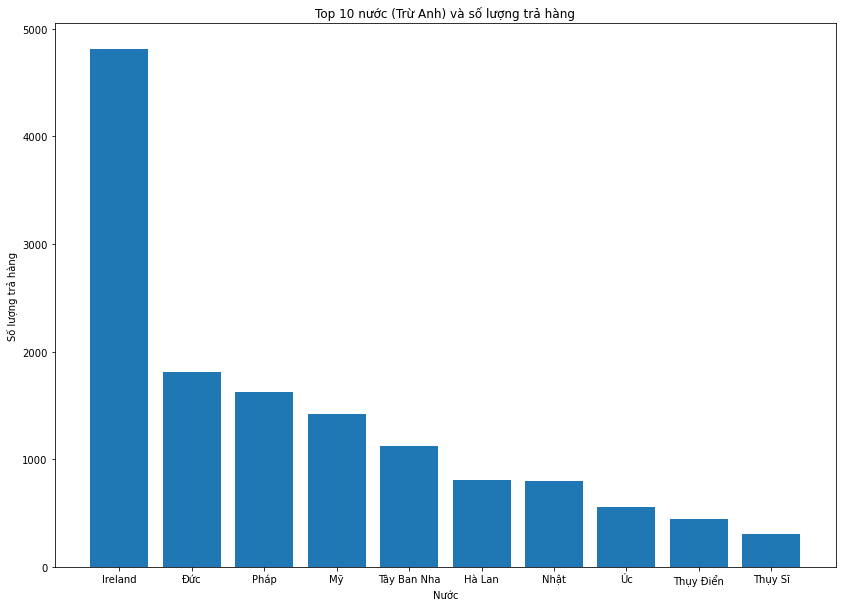

In [42]:
plt.figure(figsize = (14,10))
plt.bar(top_10_tra.khu_vuc, height = -top_10_tra.so_luong)
plt.xlabel("Nước")
plt.ylabel("Số lượng trả hàng")
plt.title("Top 10 nước (Trừ Anh) và số lượng trả hàng")
plt.show()

* Khoảng cách từ Ireland tới Anh khoảng 600km 
* Khoảng cách từ Đức tới Anh khoảng 1000km
* Có thể do khoảng cách xa nên trong quá trình vận chuyển phát sinh lỗi nên trả hàng 

In [43]:
df_test1 = df_tra_hang.loc[df_tra_hang.don_gia==0]
df_test2 = df_tra_hang.loc[df_tra_hang.don_gia!=0]

In [44]:
top = df_test2[["mo_ta","so_luong", "don_gia","tong_don_gia","thang"]]
top =top.sort_values(by = "so_luong" , ascending =True)
top_5 = top[2:7]
top_5

,mo_ta,so_luong,don_gia,tong_don_gia,thang
4287,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,1000.0,-9360000.0,12
160145,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,48000.0,-149472000.0,4
160144,GIN + TONIC DIET METAL SIGN,-2000,42000.0,-84000000.0,4
160143,WHITE HANGING HEART T-LIGHT HOLDER,-1930,58000.0,-111940000.0,4
224419,HERB MARKER BASIL,-1515,13000.0,-19695000.0,6


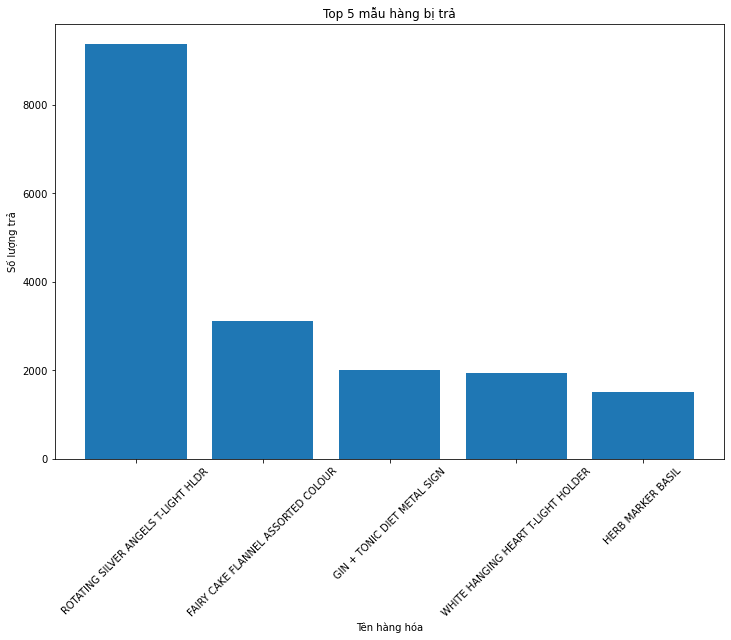

In [45]:
plt.figure(figsize = (12,8))
plt.bar(top_5.mo_ta, height = -top_5.so_luong)
plt.xticks(top_5.mo_ta, rotation=45)
plt.xlabel("Tên hàng hóa")
plt.ylabel("Số lượng trả")
plt.title("Top 5 mẫu hàng bị trả")
plt.show()

* ROTATING SILVER ANGELS T-LIGHT HLDR : đồ trang trí (khi đôt nến có thể dùng)
* FAIRY CAKE FLANNEL ASSORTED COLOUR : Son

In [46]:
data.loc[data.mo_ta=="PAPER CRAFT , LITTLE BIRDIE"]

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,48000.0,3.887760e+09,16446.0,Anh,2011,12,9,Đông,Châu Âu
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,48000.0,-3.887760e+09,16446.0,Anh,2011,12,9,Đông,Châu Âu


In [47]:
data.loc[data.mo_ta=="MEDIUM CERAMIC TOP STORAGE JAR"].head(2)

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,24000.0,1.781160e+09,12346.0,Anh,2011,1,18,Xuân,Châu Âu
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,24000.0,-1.781160e+09,12346.0,Anh,2011,1,18,Xuân,Châu Âu


* 2 mặt hàng này mua vói số lượng lớn nhưng trả ngay sau đó , khả năng cao là mua nhầm hoặc lỗi ở bên cửa hàng
* PAPER CRAFT , LITTLE BIRDIE : những mô hình (đồ trang trí) được làm từ giấy 
* MEDIUM CERAMIC TOP STORAGE JAR : những đồ đựng vật dụng hằng ngày hoặc đựng nước (cũng có thể là để trang trí)




### Tính Tỉ lệ trả hàng ở mỗi tháng 

In [48]:
df_thang = data[["thang", "so_luong", "tong_don_gia"]].groupby("thang").sum().reset_index()

In [49]:
df_thang = df_thang.sort_values(by = "thang")

In [50]:
df1_tra = df_tra_hang[["so_luong", "tong_don_gia", "thang"]].groupby("thang").sum().reset_index()
df1_tra.sort_values(by="thang")
df1_tra = df1_tra.rename(columns = {"thang":"thang_tra", "so_luong":"so_luong_tra","tong_don_gia":"don_gia_tra"})
df1_tra["so_luong"] = df_thang.so_luong
df1_tra["ti_le_tra(%)"] = ((-df1_tra["so_luong_tra"] / df1_tra["so_luong"]).round(3))*100

In [51]:
df1_tra

,thang_tra,so_luong_tra,don_gia_tra,so_luong,ti_le_tra(%)
0,1,-88750,-3.020018e+09,308966,28.7
1,10,-58213,-1.928389e+09,570532,10.2
2,11,-31312,-1.091583e+09,740286,4.2
3,12,-108807,-6.438634e+09,568561,19.1
4,2,-8706,-5.845190e+08,277989,3.1
5,3,-33078,-7.861450e+08,351872,9.4
6,4,-23078,-1.017677e+09,289098,8.0
7,5,-19034,-1.080015e+09,380391,5.0
8,6,-52714,-1.615771e+09,341623,15.4
9,7,-16423,-8.672770e+08,391116,4.2


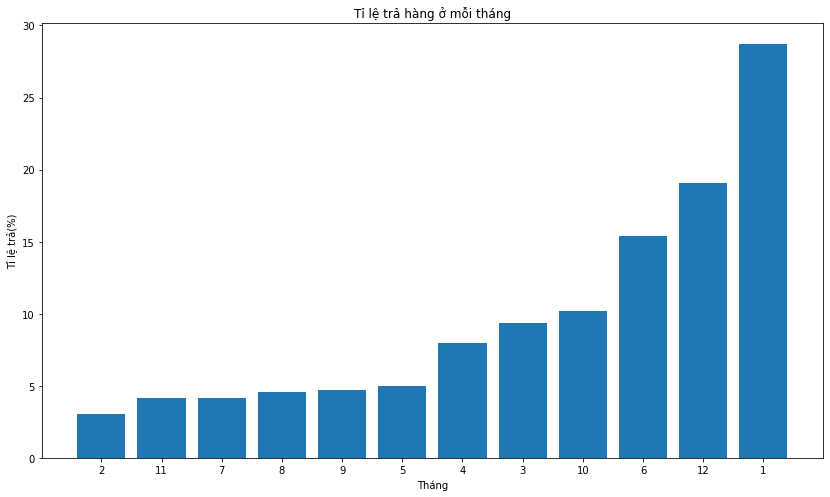

In [52]:
df1_tra = df1_tra.sort_values(by="ti_le_tra(%)")
plt.figure(figsize = (14,8))
plt.bar(df1_tra.thang_tra, height = df1_tra['ti_le_tra(%)'])
plt.title("Tỉ lệ trả hàng ở mỗi tháng")
plt.xlabel("Tháng")
plt.ylabel("Tỉ lệ trả(%)")
plt.show()

* Thường thì tỉ lệ trả hàng khá thấp , nhưng ở tháng 1 và 12 thì tỉ lệ cao hơn các tháng còn lại khá nhiều 
* Có thể là do vào dịp giáng sinh hoặc lúc đón năm mới mua nhiều đồ mà chưa lên kế hoạch mua dẫn đến hàng bị thừa -> trả hàng
* Cũng có thể do vấn đề từ cửa hàng ( gửi sai , trong quá trình gửi thì hàng hỏng)

In [53]:
data.head()

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,58000.0,348000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,63000.0,504000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,78000.0,468000.0,17850.0,Anh,2010,12,1,Đông,Châu Âu


In [54]:
df1 = data[data["mua"]=="Xuân"]
df1

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,45000.0,450000.0,13313.0,Anh,2011,1,4,Xuân,Châu Âu
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,10000.0,250000.0,13313.0,Anh,2011,1,4,Xuân,Châu Âu
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,10000.0,250000.0,13313.0,Anh,2011,1,4,Xuân,Châu Âu
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,48000.0,240000.0,13313.0,Anh,2011,1,4,Xuân,Châu Âu
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,29000.0,290000.0,13313.0,Anh,2011,1,4,Xuân,Châu Âu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31 19:54:00,292000.0,292000.0,17781.0,Anh,2011,3,31,Xuân,Châu Âu
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31 19:54:00,292000.0,2044000.0,17781.0,Anh,2011,3,31,Xuân,Châu Âu
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31 19:55:00,24000.0,2400000.0,16365.0,Anh,2011,3,31,Xuân,Châu Âu
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31 19:55:00,113000.0,113000.0,16365.0,Anh,2011,3,31,Xuân,Châu Âu


In [61]:
mua_xuan = df1[["mo_ta","so_luong"]]
mua_xuan = mua_xuan.groupby("mo_ta").sum().reset_index()
mua_xuan = mua_xuan.sort_values(by = "so_luong", ascending = False)
top5 = mua_xuan.head(5)

In [63]:
top5

,mo_ta,so_luong
1377,JUMBO BAG RED RETROSPOT,10998
1775,PACK OF 72 RETROSPOT CAKE CASES,9479
2830,WHITE HANGING HEART T-LIGHT HOLDER,9386
2902,WORLD WAR 2 GLIDERS ASSTD DESIGNS,8898
2540,SMALL POPCORN HOLDER,7270


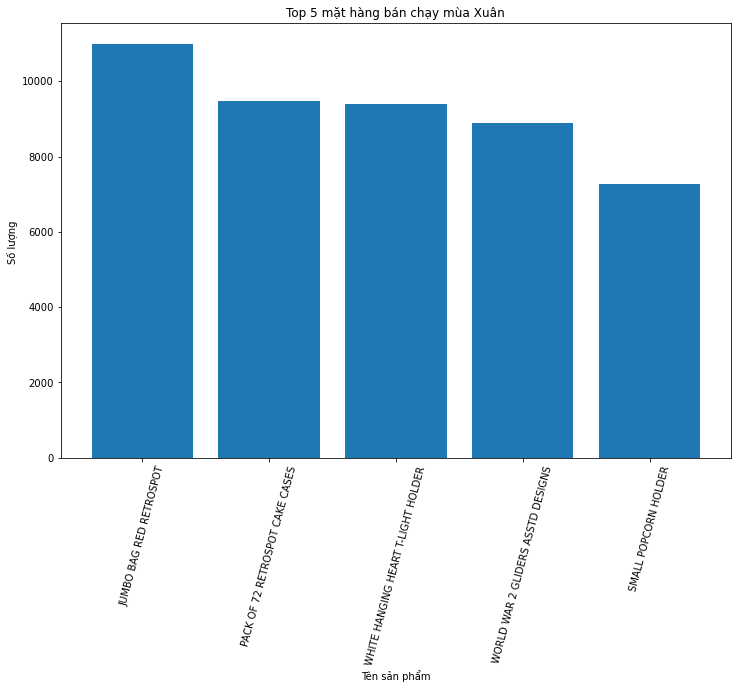

In [80]:
plt.figure(figsize = (12, 8))
plt.bar(top5.mo_ta, height = top5.so_luong)
plt.xticks(top5.mo_ta, rotation=75)
plt.xlabel("Tên sản phẩm")
plt.ylabel("Số lượng ")
plt.title("Top 5 mặt hàng bán chạy mùa Xuân")
plt.show()

In [81]:
df1 = data[data["mua"]=="Hạ"]
df1

,ma_giao_dich,ma_hang,mo_ta,so_luong,ngay_gio,don_gia,tong_don_gia,ma_khach_hang,khu_vuc,nam,thang,ngay,mua,chau_luc
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,38000.0,380000.0,18161.0,Anh,2011,4,1,Hạ,Châu Âu
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,38000.0,456000.0,18161.0,Anh,2011,4,1,Hạ,Châu Âu
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,19000.0,228000.0,18161.0,Anh,2011,4,1,Hạ,Châu Âu
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,228000.0,456000.0,18161.0,Anh,2011,4,1,Hạ,Châu Âu
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,58000.0,348000.0,18161.0,Anh,2011,4,1,Hạ,Châu Âu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245898,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30 20:08:00,10000.0,120000.0,17891.0,Anh,2011,6,30,Hạ,Châu Âu
245899,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30 20:08:00,10000.0,120000.0,17891.0,Anh,2011,6,30,Hạ,Châu Âu
245900,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30 20:08:00,10000.0,120000.0,17891.0,Anh,2011,6,30,Hạ,Châu Âu
245901,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30 20:08:00,10000.0,120000.0,17891.0,Anh,2011,6,30,Hạ,Châu Âu


In [82]:
ha = df1[["mo_ta","so_luong"]]
ha = ha.groupby("mo_ta").sum().reset_index()
ha = ha.sort_values(by = "so_luong", ascending = False)
top5 = ha.head(5)

In [83]:
top5

,mo_ta,so_luong
3056,WORLD WAR 2 GLIDERS ASSTD DESIGNS,16158
182,ASSORTED COLOURS SILK FAN,9996
2675,SMALL POPCORN HOLDER,9831
1451,JUMBO BAG RED RETROSPOT,9745
1863,PACK OF 72 RETROSPOT CAKE CASES,8301


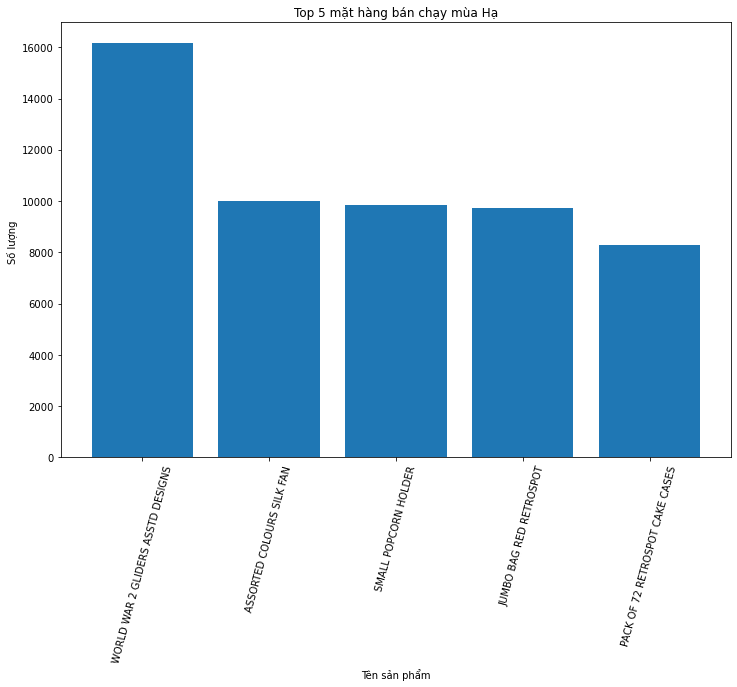

In [84]:
plt.figure(figsize = (12, 8))
plt.bar(top5.mo_ta, height = top5.so_luong)
plt.xticks(top5.mo_ta, rotation=75)
plt.xlabel("Tên sản phẩm")
plt.ylabel("Số lượng ")
plt.title("Top 5 mặt hàng bán chạy mùa Hạ")
plt.show()

### Module Apriori 

In [3]:
df = pd.read_csv("giao_dich_clean.csv", index_col="Unnamed: 0")

In [4]:
test = df[df["so_luong"]>0]
appi = test.groupby("ma_giao_dich").agg(ID=("ma_hang",list)).reset_index()
appi =appi[:-3]

In [5]:
for i in range(20725):
    if len(appi["ID"][i]) > 20:
        appi = appi.drop(index = i)

In [6]:
len(appi)

13175

In [7]:
x = appi["ID"].tolist()
tmp = pd.DataFrame(x)
tmp = tmp.fillna(0)

In [8]:
tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,85123A,71053,84406B,84029G,84029E,22752,21730,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22633,22632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,84879,22745,22748,22749,22310,84969,22623,22622,21754,21755,21777,48187,0,0,0,0,0,0,0,0
3,22960,22913,22912,22914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
records = []
for i in range(0, 13175 ):
    records.append([str(tmp.values[i,j]) for j in range(0, 20)])

In [13]:
association_rules = apriori(records, min_support=0.005, min_confidence=0.1, min_lift=2, min_length=2)
association_results = list(association_rules)
len(association_results)

252

### Tạo dataframe chứa sản phẩm mua , sản phẩm gợi ý 

In [18]:
df_res = pd.DataFrame(columns = ["antecedents", "consequents", "support", "confidence", "lift"])
for item in association_results:
    pair = item[0]
    items =[x for x in pair]
    it_1 = items[0]
    it_2 = items[1]
    sup = round((item[1]), 4)
    conf = round((item[2][0][2]), 4)
    lift = round((item[2][0][3]), 4)
    df_res=df_res.append(pd.DataFrame([[it_1, it_2, sup, conf, lift]], columns=df_res.columns),ignore_index=True)

In [19]:
df_res = df_res.sort_values(by="confidence", ascending = False).reset_index()
df_res =df_res[df_res["antecedents"]!='0'].reset_index()
del df_res["index"]
del df_res['level_0']
df_res = df_res[df_res["confidence"]>0.2]
df_res.head(3)

,antecedents,consequents,support,confidence,lift
0,23175,23174,0.0050,0.7765,102.3000
1,21086,21094,0.0063,0.7685,87.2865
2,21136,84879,0.0073,0.7500,16.6913


###  Tìm những mã sản phẩm có liên quan tới sản phẩm đã mua 

In [20]:
def recomd(a):
    setA = []
    for i in range(len(df_res)):
        if df_res["antecedents"][i] == a:
            if df_res["consequents"][i] not in setA:
                setA.append(df_res["consequents"][i])
    return set(setA)

In [ ]:
# Stripping extra spaces in the description
df['ma_hang'] = df['ma_hang'].str.strip()
 
# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['ma_giao_dich'], inplace = True)
df['ma_giao_dich'] = df['ma_giao_dich'].astype('str')
 
# Dropping all transactions which were done on credit
df = df[~df['ma_giao_dich'].str.contains('C')]

### France

In [22]:
dfFrance = df[df['khu_vuc'] =="Pháp"]
dfFrance = dfFrance.loc[dfFrance["mo_ta"] != "POSTAGE"]

In [23]:
basket_France = (dfFrance
          .groupby(['ma_giao_dich', 'ma_hang'])['so_luong']
          .sum().unstack().reset_index().fillna(0)
          .set_index('ma_giao_dich'))

In [24]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

#Encoding the datasets
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded

In [25]:
#model
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)
 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules_Fran = rules.sort_values('confidence', ascending =False)
rules_Fran=rules_Fran.reset_index()
del rules_Fran["index"]
rules_Fran.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(21094, 21080)",(21086),0.089286,0.120536,0.087054,0.975000,8.088889,0.076291,35.178571
1,"(21086, 21080)",(21094),0.089286,0.111607,0.087054,0.975000,8.736000,0.077089,35.535714
2,(21094),(21086),0.111607,0.120536,0.107143,0.960000,7.964444,0.093690,21.986607
3,(23256),(23254),0.060268,0.062500,0.055804,0.925926,14.814815,0.052037,12.656250
4,(23254),(23256),0.062500,0.060268,0.055804,0.892857,14.814815,0.052037,8.770833


In [26]:
rules_F = rules_Fran[rules_Fran["confidence"]>0.5]

In [27]:
def recommend_France(A):
    setA= set()
    res = rules_F[rules_F["antecedents"] == frozenset(A)].consequents
    for i in list(res):
        setA.update(set(i))
    return setA

In [28]:
b = ['22554', '22556']
print(set(b), "---->",recommend_France(b))

{'22554', '22556'} ----> {'22551'}


### England

In [41]:
df_Eng = df[df['khu_vuc'] =="Anh"]
df_Eng = df_Eng.loc[df_Eng["mo_ta"] != "POSTAGE"]

In [42]:
basket_Eng = (df_Eng
          .groupby(['ma_giao_dich', 'ma_hang'])['so_luong']
          .sum().unstack().reset_index().fillna(0)
          .set_index('ma_giao_dich'))

In [44]:
basket_encoded = basket_Eng.applymap(hot_encode)
basket_Eng = basket_encoded
basket_Eng.head()

ma_hang,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
ma_giao_dich,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#model
frq_items_eng = apriori(basket_Eng, min_support = 0.02, use_colnames = True)
len(frq_items_eng)

213

In [46]:
rules = association_rules(frq_items_eng, metric ="lift", min_threshold = 1)
rules_Eng = rules.sort_values('confidence', ascending =False)
rules_Eng=rules_Eng.reset_index()
del rules_Eng["index"]

In [47]:
rules_Eng = rules_Eng[rules_Eng["confidence"]>0.25]
rules_Eng.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(22699, 22698)",(22697),0.023315,0.039884,0.021052,0.902930,22.638998,0.020122,9.891008
1,"(22698, 22697)",(22699),0.024639,0.040866,0.021052,0.854419,20.907830,0.020045,6.588337
2,(22698),(22697),0.030020,0.039884,0.024639,0.820768,20.578960,0.023442,5.356839
3,(22698),(22699),0.030020,0.040866,0.023315,0.776671,19.005320,0.022089,4.294721
4,(22697),(22699),0.039884,0.040866,0.029934,0.750535,18.365764,0.028304,3.844769


In [48]:
def recommend_Eng(A):
    setA= set()
    res = rules_Eng[rules_Eng["antecedents"] == frozenset(A)].consequents
    for i in list(res):
        setA.update(set(i))
    return setA

In [49]:
A = ['22699', '22698']
print(set(A), "---->",recommend_Eng(A))

{'22699', '22698'} ----> {'22697'}


## other 

In [50]:
df_1 = df[df['khu_vuc'] !="Anh"]
df_1 = df_1[df_1['khu_vuc'] !="Pháp"]
df_1 = df_1.loc[df_1["mo_ta"] != "POSTAGE"]

In [51]:
basket_1 = (df_1
          .groupby(['ma_giao_dich', 'ma_hang'])['so_luong']
          .sum().unstack().reset_index().fillna(0)
          .set_index('ma_giao_dich'))

In [52]:
basket_encoded = basket_1.applymap(hot_encode)
basket_1 = basket_encoded

In [54]:
frq_items_1 = apriori(basket_1, min_support = 0.018, use_colnames = True)
len(frq_items_1)

369

In [55]:
rules = association_rules(frq_items_eng, metric ="lift", min_threshold = 1)
rules_1 = rules.sort_values('confidence', ascending =False)
rules_1=rules_1.reset_index()
del rules_1["index"]

In [56]:
rules_1 = rules_1[rules_1["confidence"]>0.2]

In [57]:
def recommend_1(A):
    setA= set()
    res = rules_1[rules_1["antecedents"] == frozenset(A)].consequents
    for i in list(res):
        setA.update(set(i))
    return setA

In [58]:
a = ['20727']
print(set(a), "---->",recommend_1(a))

{'20727'} ----> {'22384', '22383', '22382', '20728', '20725'}
